I'm not entirely sure what I did, but I needed to brew install ffmpeg in order for this code to work. 

In [3]:
pip install pydub ffprobe ffmpeg

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=f7a8056780b40eb403ccaf503f4cd48e3e76297fa5495278c9f869e70ac77eff
  Stored in directory: /Users/xblee/Library/Caches/pip/wheels/56/30/c5/576bdd729f3bc062d62a551be7fefd6ed2f761901568171e4e
Successfully built ffmpeg
Note: you may need to restart the kernel to use updated packages.


The first step is to make sure that all of our files are wav files so that we can read and write using python wave. 

** I think I can record audio from my vinyl collection and remove artifacts from the vinyl?

In [5]:
import sys

from pydub import AudioSegment
AudioSegment.converter = "/Users/xblee/Downloads/ffmpeg"
AudioSegment.ffmpeg = "/Users/xblee/Downloads/ffmpeg"
AudioSegment.ffprobe = "/Users/xblee/Downloads/ffmpeg"
import IPython
import numpy as np
import wave
from os import path

path = './audio_files/'

# files
src = "once-in-paris-168895.mp3"
dst = "once-in-paris-168895.wav"

# convert from mp3 to wav
sound = AudioSegment.from_mp3(path + src)
sound.export(path + dst, format="wav")



<_io.BufferedRandom name='./audio_files/once-in-paris-168895.wav'>

In [6]:
wave_1 = wave.open(path + dst, 'r')

In [50]:
print(wave_1.getparams())
print('song length in seconds: ' + str(5841792/44100))

_wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=5841792, comptype='NONE', compname='not compressed')
song length in seconds: 132.46693877551022


5841792


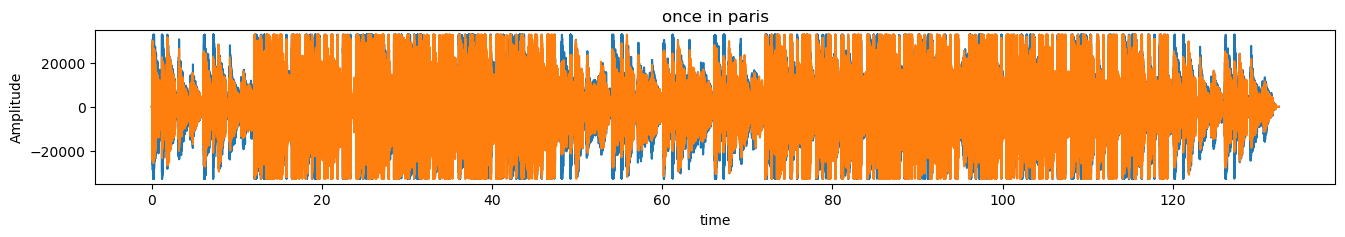

In [49]:
from scipy.io import wavfile
import matplotlib.pyplot as plt

samplerate, data = wavfile.read(path+dst)
print(len(data))

timing = np.linspace(0,len(data)/samplerate, num=len(data))

plt.figure(figsize=(16,2))
plt.ylabel("Amplitude")
plt.xlabel("time")
plt.ylim(-35000,35000)
plt.title("once in paris")
plt.plot(timing, data)
plt.show()

In [62]:
from sklearn.decomposition import FastICA

# no components first to see what happens in initializaiton
ica = FastICA()

ica_result = ica.fit_transform(data)

/Users/xblee/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/xblee/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:589: UserWarning: n_components is too large: it will be set to 2
  warnings.warn(


In [63]:
ica_result.shape

(49764450, 2)

In [64]:
result_1 = ica_result[:,0]
result_2 = ica_result[:,1]

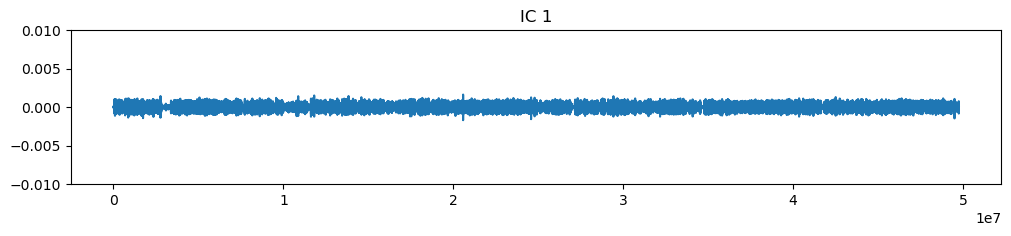

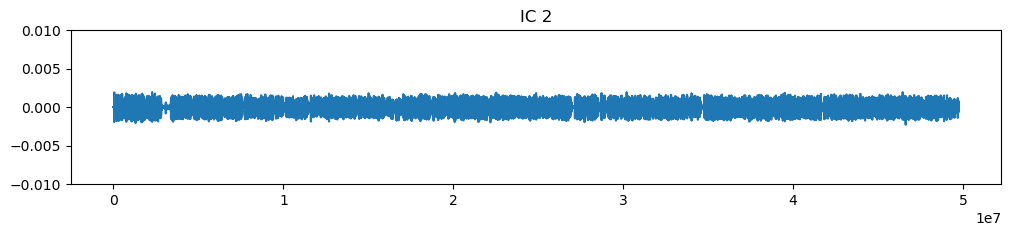

In [65]:
plt.figure(figsize=(12,2))
plt.title("IC 1")
plt.plot(result_1)
plt.ylim(-0.01, 0.01)
plt.show()

plt.figure(figsize=(12,2))
plt.title("IC 2")
plt.plot(result_2)
plt.ylim(-0.01, 0.01)
plt.show()

In [66]:
result_1_int = np.int16(result_1*32767*100)
result_2_int = np.int16(result_2*32767*100)

wavfile.write('result_1.wav', fs, result_1_int)
wavfile.write('result_2.wav', fs, result_2_int)